# Abstract

The Baltimore City Police Department is tasked everyday to stop crime in one of the most crime ridden cities in the country.  In this project I will analyze some crime data for Baltimore in attempt to predict what weapon was used in a crime given the other features of the crime such as time of day, time of year, inside/outside, description, and so on.  In the introduction section I will give more background information about the knowledge necessary for understanding the goals.  Following, in the research questions section I state the question we are trying to answer and give a goal for the accuracy to reach.  Next, I show the data cleaning process I used as well as some exploratory data analysis for some stats and trends in the data.  Then I jump into the machine learning portion, first with a feature engineering section to prepare the data further, followed by the modeling section containing the models.  I will then interpret and discuss the results followed by a section stating the conclusions and summary of the findings.  Lastly, I state some of the limitations of this work and suggest some future strategies that might be able to help improve our results.  References and contributions listed at the bottom.

# Introduction

For this project, I chose to perform data analysis on Baltimore City crime data.  The motivation in analyzing this data is to find patterns and trends in crimes as well as run predictive analytics so that we may learn more information and be better prepared to stop crime.  This can be useful in numerous ways.  For example, say police are expecting a crime in a certain location at a certain time, and know a general description of it - they could also try to predict what weapon will be used in the crime to know what they will be up against and be prepared.  If there is a crime expected and a firearm is likely to be used, police should be ready for a gun fight.  Secondly, say the crime already happened and the police officer recieved a call giving a general location, and description - when enroute to the crime and arriving on the scene it would be helpful for them to know what kind of weapon they are up against.  This information can inform the officer of whther or not the suspect is likely to be armed, and what kind of person they are going to have to deal with so that they may be best prepared for the situation.

The data:
To perform this analysis, I will use a data set named "BPD Part 1 Victim Based Crime Data" from Open Baltimore (Here: https://data.baltimorecity.gov/Public-Safety/BPD-Part-1-Victim-Based-Crime-Data/wsfq-mvij/data).  This data is updated every Monday, with a 9 day time lag to minimize changes to the data as records move throughout the BPD review process.  I exported this data as a CSV file and began the cleaning of it from there.  The data contains 16 columns and 313,634 rows.  One limitation is that a lot of the weapons in the dataset are null, since for the purpose of this project our goal is to predict the type of weapon used, we will say that in the case the weapon used is null, there was no weapon used.  These cases where the weapon is null include cases where it is fairly obvious that no weapon is really applicable such as a car theft where there was no intervention between people, just the car stolen; or a burglary where the suspect broke in somewhere and robbed the place without a weapon or any interaction with a victim.  Another limitation is that the weapon may be classified as only one of 5 then categories: HANDS, KNIFE, FIREARM, OTHER, None.  With this, we can only predict one of those from this dataset and the OTHER category may not be too useful for an officer to know about.  But the cases of knowing when a FIREARM / KNIFE / HANDS are used would be very useful it is still a very important prediction as that informaiton is vital to saving lives on the streets of Baltimore.


# Research Question

The question at hand here is if we can we predict what weapon will be used in a particular victim based crime.  This would benefit police officers by either knowing before the crime happens what to be on the lookout for/prepared for or after the fact for when they arrive on the scene to know what to expect ]/ be prepared for.

Based on a dummy model, if we simply predicted that every crime was commited with no weapon at all, we would have an accuracy score of: 78.7%.

So, we will make it our goal to beat that accuracy score with out model.  Can we predict what weapon will be used in a particular crime with a higher accuracy rate than 78.7%?

# Data Cleaning

Cleaning the data:
The following are the steps, techniques and assumptions I used to clean the data:
1.  I use pandas read_csv to read the csv file which had a 'utf-8' encoding.
2.  I look at the column names to analyze which columns are good for answering our questions, and which contain duplicate information/ are not valuable and can be gotten rid of.  The techniques I use here are the pandas dataframe info() and head() functions to gain a better understanding of the data.  I also scrolled through the csv in excel to eyball the data quickly to get a better understanding of it.
3. I use the rename function with a lamda function to replace the spaces and slashes with an empty string to get rid of them.  
4. After looking at head(), I see that it looks like the TotalIncidents column is always 1, so I count the number of values in that column equal to one and turns out, it is the same number as there are rows (313,634), meaning they are all 1, which tells us nothing and this column may be dropped.  
5. It looks like the contents of the vri_name1 column are contained in the District column.  That, combined with the fact that there are only 37,056 non-null values in the vri_name1 column leads me to the decision that it can be dropped for simplicity.  This should be noted that our results will not have any analysis of the vri_name1 column (some are slightly different than the district and this content will not be represented, we deem it unimportant for the time being but it could come into play later. 
6. After looking at the output of the info() function, it is determined that the column, Location1, has 0 non-null values and can obviously be dropped.
7. I drop those 3 columns (Location1, vri_name1, TotalIncidents) using the pandas drop function.
8. Now that the columns are set, I look at handling the missing values and inconsistencies. The data has 313,634 entries.  I look at the output of the pandas info() function to gain more information from about the numbers of null values.  The columns of CrimeTime, Location, InsideOutside, Weapon, Post, District, Neighborhood, Longitude, Latitude, Premise all contain null values.  
    * The weapon column only had 66,908 non-null values, with so many nulls, I made the assumption that a null weapon means no weapon was used and filled them with 'None' using the pandas fillna function.
    * CrimeTime and Post each had small amounts of null values, and there is not a great way to fill them without introducing bias to the data.  For example, filling the missing times with midnight would increase the number of crimes at midnight to more than they should be when doing time analysis.  So, any row with a null for CrimeTime or Post, I drop.
    * The remaining columns of Location, InsideOutside, Neighborhood, and Premise are all strings and we can easily replace their nulls with 'Unknown' so that we can keep those data rows, and at the same time keep in mind that there are unknowns when doing the analysis.
9. I clean other inconsistencies such as FIRE to FIREARM and I to Inside, O to Outside.
10. I write the cleaned pandas dataframe to a csv file to be loaded from the explore workbook.  For the code of this cleaning, please see the load_and_clean workbook.

In [60]:
#imports
import pandas as pd
import matplotlib.pyplot as plt # for visualizations

#ML Packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#pre-processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

#metrics and reporting
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [4]:
#read in the raw csv file
crime_data = pd.read_csv("../data/BPD_crime_data.csv", encoding= 'utf-8')

In [7]:
#Next we will begin the cleaning process

#Let's look to see what columns we can get rid of

#set the column names to be camelCase convention, contert the Inside/Outside column name
#simplest one-liner to just replace the / with ""
crime_data_correct_columns = crime_data.copy()
crime_data_correct_columns = crime_data_correct_columns.rename(columns= lambda x: x.replace("/", ""));
crime_data_correct_columns = crime_data_correct_columns.rename(columns= lambda x: x.replace(" ", ""));

#First, we notice that the 'Total Incidents' column is always 1, which tells us nothing so we get rid of it
#proven here by seeing the count is equal to the number of rows
print("Number of 1's in total incidents column: ", crime_data_correct_columns[crime_data_correct_columns.TotalIncidents == 1].count())

#Let's see if the info on the data:
crime_data.info()

#We notice that the 'Location 1' column has 0 non-null values, so that column can also be dropped
#It looks like the contents of the vri_name1 column are contained in the District column.  That, combined with the
#fact that there are only 37,056 non-null values in the vri_name1 column leads me to the decision that it can be
#dropped for simplicity.  This should be noted that our results will not have any analysis of the vri_name1 column
#(some are slightly different than the district and this content will not be represented, we deem it unimportant 
#for the time being but it could come into play later. 


#Drop those 3 columns
crime_data_correct_columns = crime_data_correct_columns.drop(columns=['TotalIncidents', 'vri_name1', 'Location1'])

crime_data_correct_columns.head(2)
crime_data_correct_columns.info()

Number of 1's in total incidents column:  CrimeDate         313634
CrimeTime         313609
CrimeCode         313634
Location          312020
Description       313634
InsideOutside     275344
Weapon             66908
Post              312916
District          312916
Neighborhood      312899
Longitude         313404
Latitude          313404
Location1              0
Premise           275094
vri_name1          37056
TotalIncidents    313634
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313634 entries, 0 to 313633
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        313634 non-null  object 
 1   CrimeTime        313609 non-null  object 
 2   CrimeCode        313634 non-null  object 
 3   Location         312020 non-null  object 
 4   Description      313634 non-null  object 
 5   Inside/Outside   275344 non-null  object 
 6   Weapon           66908 non-null   object 
 7   Post  

In [9]:
#Now that we have the columns we want, lets deal with the NaN values
#Judging by the output of info on the data frame:
#there are 313,634 entries.  The columns of CrimeTime, Location, InsideOutside, Weapon, Post, District,
#Neighborhood, Longitude, Latitude, Premise all contain null values.

#There are only 66,908 non-null values for Weapon, so I'm going to assume that if weapon is NaN, then there was
#no weapon used, as I believe that is more likely than these entries all being "missing" or "incomplete"

#copy the df to a new df to modify
crime_data_cleaned = crime_data_correct_columns.copy()

#build off the correct columns df and fill them with "None"
crime_data_cleaned.Weapon.fillna("None", inplace=True)

#continuing, for the CrimeTime, there are 25 NaN values.  Since there are little of them compared to the size
#of the dataset and to avoid adding any bias by filling with a time, I will remove these NaN entries
crime_data_cleaned.dropna(subset = ["CrimeTime"], inplace=True)

#same with Post, rather than filling and potentially introducing bias, we will remove rows with NaN there
crime_data_cleaned.dropna(subset = ["Post"], inplace=True)

#The rest of the columns that contain null values are String attributes and replacing the NaN values with "Unknown"
#we can do and take note of it so that we know about it when exploring the data.  But, it makes sense to keep
#these rows as we do not want to miss any information that these rows may contain.
crime_data_cleaned.Location.fillna("UNKNOWN", inplace= True)
crime_data_cleaned.InsideOutside.fillna("UNKNOWN", inplace= True)
crime_data_cleaned.Neighborhood.fillna("UNKNOWN", inplace= True)
crime_data_cleaned.Premise.fillna("UNKNOWN", inplace= True)

#We notice also that some values in the InsideOutside column are inconsistent - some labeled inside have values of
#just "I" and others have "Inside" normoalize these to be "I", "O", or the "Unknown"
crime_data_cleaned.loc[crime_data_cleaned.InsideOutside == "I", "InsideOutside"] = "Inside"
crime_data_cleaned.loc[crime_data_cleaned.InsideOutside == "O", "InsideOutside"] = "Outside"

#Again, there is an inconsistency in the weapon data - a few have FIRE instead of FIREARM, make the correction:
crime_data_cleaned.loc[crime_data_cleaned.Weapon == "FIRE", "Weapon"] = "FIREARM"

crime_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312891 entries, 0 to 313633
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CrimeDate      312891 non-null  object 
 1   CrimeTime      312891 non-null  object 
 2   CrimeCode      312891 non-null  object 
 3   Location       312891 non-null  object 
 4   Description    312891 non-null  object 
 5   InsideOutside  312891 non-null  object 
 6   Weapon         312891 non-null  object 
 7   Post           312891 non-null  float64
 8   District       312891 non-null  object 
 9   Neighborhood   312891 non-null  object 
 10  Longitude      312891 non-null  float64
 11  Latitude       312891 non-null  float64
 12  Premise        312891 non-null  object 
dtypes: float64(3), object(10)
memory usage: 33.4+ MB


In [10]:
#Now that we have cleaned the data, let's write it back to a csv so it may be loaded from any notebook
crime_data_cleaned.to_csv('../data/cleaned_data.csv', index = False)

# Brief Exploratory Data Analysis (EDA)



In [44]:
#read in the raw csv file
crime_data = pd.read_csv("../data/cleaned_data.csv", encoding= 'utf-8')

,CrimeDate,CrimeTime,CrimeCode,Location,Description,InsideOutside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise
0,9/5/20,1:30:00,6G,800 PONTIAC AVE,LARCENY,Inside,None,913.0,SOUTHERN,BROOKLYN,-76.598564,39.233880,ROW/TOWNHOUSE-OCC
1,9/5/20,19:57:00,4E,4900 GUNTHER AVE,COMMON ASSAULT,Inside,None,443.0,NORTHEAST,FRANKFORD,-76.549157,39.327377,ROW/TOWNHOUSE-OCC
2,9/5/20,2:10:00,4D,600 MELVILLE AVE,AGG. ASSAULT,Inside,HANDS,515.0,NORTHERN,WAVERLY,-76.607271,39.331543,ROW/TOWNHOUSE-OCC
3,9/5/20,1:00:00,7A,AV & REISTERSTOWN RD,AUTO THEFT,Outside,None,611.0,NORTHWEST,LIBERTY SQUARE,-76.655664,39.322638,STREET
4,9/5/20,8:10:00,4C,1900 W FAIRMOUNT AVE,AGG. ASSAULT,Inside,OTHER,714.0,WESTERN,PENROSE/FAYETTE STREET OUTREACH,-76.647524,39.288932,ROW/TOWNHOUSE-OCC


In [36]:
#Now lets start exploring the data!
#first lets do some analysis on what effect the CrimeTime and CrimeDate has on the level of crimes
#We need to first convert the date and time from object to datetime64 to do more analysis on it
crime_data["CrimeDate"] = crime_data["CrimeDate"].astype("datetime64")
crime_data["CrimeTime"] = crime_data["CrimeTime"].astype("datetime64")

In [37]:
#Let's first create a function that creates the df with counts to avoid code duplication:
def create_counts_df(group_x_axis, group_y_axis):
    counts_df = None #initialize here for scope
    if(group_x_axis == "CrimeDate"): #if looking at the date, look at the month
        counts_df = crime_data[group_x_axis].groupby([crime_data[group_x_axis].dt.month, crime_data[group_y_axis]]).count()
    elif(group_x_axis == "CrimeTime"): #if looking at the time, look at the hour
        counts_df = crime_data[group_x_axis].groupby([crime_data[group_x_axis].dt.hour, crime_data[group_y_axis]]).count()
    else: #otherwise, just use the value in the data
        counts_df = crime_data[group_x_axis].groupby([crime_data[group_x_axis], crime_data[group_y_axis]]).count()
    counts_df = counts_df.to_frame()
    counts_df.columns = ["Count"]
    counts_df = counts_df.reset_index()
    return counts_df

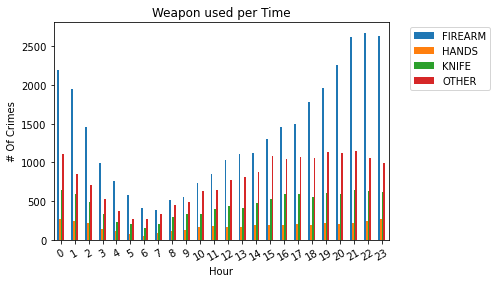

In [38]:
#Lets see if there are patterns for weapon based on time
weapon_time_df = create_counts_df("CrimeTime", "Weapon")
#First tried with including 'None' but too many are 'None' to see the other distributions
weapon_time_df = weapon_time_df[weapon_time_df.Weapon != 'None']

ax = weapon_time_df.pivot(index='CrimeTime', columns='Weapon').plot(kind='bar', title="Weapon used per Time", ylabel="# Of Crimes", xlabel="Hour", rot=30)
patches, labels = ax.get_legend_handles_labels()
labels = ['FIREARM', 'HANDS', 'KNIFE', 'OTHER']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

Based on the visulaization, it looks like the times do indeed have an impact on the weapon type used.  The biggest takeaway looks to be that firearms are used more in the later hours of the night.  Take a look at the hours 15-23 - the level of crimes for using hands, knife, and other remain relatively constant but the use of firearms increases dramatically during this time frame.  This shows that after dark, it is more likely that a firearm may be used and police should be aware of this trend to be prepared for potential crimes involving firearms at that time.  We certainly will want to be aware that the time looks to have an impact on weapon used and add it into our model used to predict the weapon type.

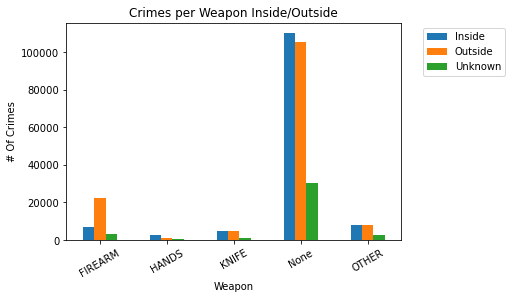

In [39]:
#Lets see if there are patterns for weapon based on inside/outside
weapon_I_O_df = create_counts_df("Weapon", "InsideOutside")

ax = weapon_I_O_df.pivot(index='Weapon', columns='InsideOutside').plot(kind='bar', title="Crimes per Weapon Inside/Outside", ylabel="# Of Crimes", xlabel="Weapon", rot=30)
patches, labels = ax.get_legend_handles_labels()
labels = ['Inside', 'Outside', 'Unknown']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

Next, we analyze the trends of crimes inside vs. outside based on the weapon used.  From the visualization we see that when a firearm is used, it is more often than not used outside.  On the other hand, when hands are used it is more often than not used inside.  So, if police get reports of a shooting, there is a higher likelihood that they should be looking for the suspect outdoors.  If there is a report of a crime involving hands, they should be more prepared to handle and indoors crime.  This also says that if an officer is on duty outside, they should be better prepared for a shooting than officers inside - police more suited for shootings should be placed on duty in the outdoors.  This is important, because with shootings the severity of the crime may be escalated to a life or death situation and repsonding well to these could save lives.

The results from this exploratin show that including whether the crime happened inside or outside appears to have an impact on the weapon used and we will want to include inside/outside in our model.

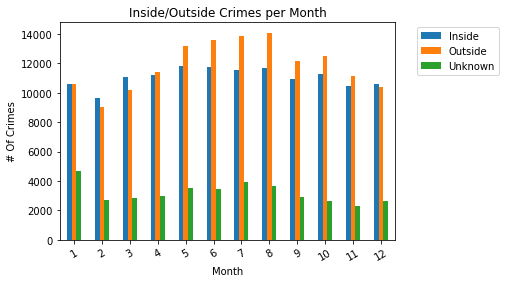

In [40]:
#Great, now lets see if there are patterns for inside/outside based on month of year
month_df = create_counts_df("CrimeDate", "InsideOutside")

ax = month_df.pivot(index='CrimeDate', columns='InsideOutside').plot(kind='bar', title="Inside/Outside Crimes per Month", ylabel="# Of Crimes", xlabel="Month", rot=30)
patches, labels = ax.get_legend_handles_labels()
labels = ['Inside', 'Outside', 'Unknown']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

Now that we know whether a crime is inside/outside does appear to have an effect on the weapon type used, we can explore if the time of year has a relationship with the level of crimes inside/outside.

The data proves that depending on the time of year, they should be more prepared to stop crimes inside vs. outside.  For the warmer months of 4-11 (April - November) the number of crimes outside is higher than those inside.  For the other colder months of 12-3 (December - March) crimes inside vs. outside tend to have about the same or higher likelihood to be inside as they do outside.  The conclusion to be drawn here is that police should expect less crime outside during the colder months, and focus more resources on preventing the outside crime in the warmer months of the year.

With this, it may be useful to include the month in our model as if the crime was commited in a warmer month it may be useful to know.  If more crimes are known to happen outside in the summer months, it may lead to more FIREARMS being used in the summer months as well.

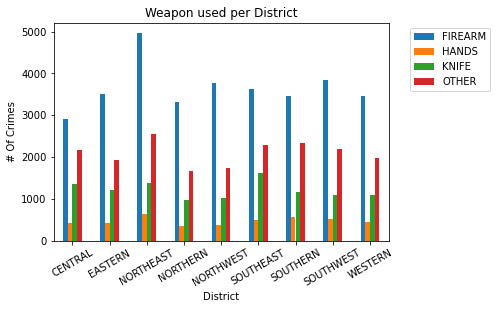

In [41]:
#Lets see if there are patterns for weapon based on District
weapon_district_df = create_counts_df("District", "Weapon")
#First tried with including 'None' but too many are 'None' to see the other distributions
weapon_district_df = weapon_district_df[weapon_district_df.Weapon != 'None']

ax = weapon_district_df.pivot(index='District', columns='Weapon').plot(kind='bar', title="Weapon used per District", ylabel="# Of Crimes", xlabel="District", rot=30)
patches, labels = ax.get_legend_handles_labels()
labels = ['FIREARM', 'HANDS', 'KNIFE', 'OTHER']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

The goal with this visualization is to determine whether or not there is a trend between district and the weapon used.  For example, do firearms tend to be used more frequently in the souther district as opposed to the western?  The data shows that each district looks about even in their distribution of weapon used.  None of them really stick out, the northeast has the highest usage of firearms by far, but they also have more crime in general with the other weapons as well (perhaps the northeast district is larger and hence results in more crime).  The conclusion here is that police in all districts should be able to handle all of these types of crime and the type of crime that occurs does not really depend on the district.

This conclusion tells us that the district may not have a huge impact on our ability to predict what weapon was used.  We may experiment with it in our model, but it may be a feature to leave out.

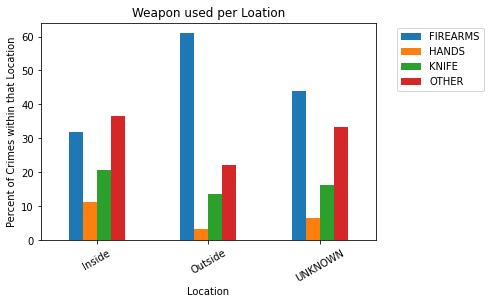

In [45]:
#Lets see if there are patterns for weapon based on InsideOutside
I_O_weapon_df = create_counts_df("InsideOutside", "Weapon")
#First tried with including 'None' but too many are 'None' to see the other distributions
I_O_weapon_df = I_O_weapon_df[I_O_weapon_df.Weapon != 'None']

#get some percentages, counts are less relevant, given inside/oustide what pct of crimes use that weapon?
#of the crimes that happen inside:
sum_outside = I_O_weapon_df[I_O_weapon_df.InsideOutside == 'Outside']['Count'].sum()
sum_inside = I_O_weapon_df[I_O_weapon_df.InsideOutside == 'Inside']['Count'].sum()
sum_unknown = I_O_weapon_df[I_O_weapon_df.InsideOutside == 'UNKNOWN']['Count'].sum()

def generate_pcts(I_O_weapon_df):
    pcts = []
    for index, row in I_O_weapon_df.iterrows():
        if(row['InsideOutside'] == "Inside"):
            pcts.append((row["Count"]/sum_inside)*100)
        elif(row['InsideOutside'] == "Outside"):
            pcts.append((row["Count"]/sum_outside)*100)
        else:
            pcts.append((row["Count"]/sum_unknown)*100)
    return pcts

I_O_weapon_df['pcts'] = generate_pcts(I_O_weapon_df)

ax = I_O_weapon_df.pivot(index='InsideOutside', columns='Weapon', values='pcts').plot(kind='bar', title="Weapon used per Loation", ylabel="Percent of Crimes within that Location", xlabel="Location", rot=30)
patches, labels = ax.get_legend_handles_labels()
labels = ['FIREARMS', 'HANDS', 'KNIFE', 'OTHER']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

Building off the previous finding that firearms tend to be used outside, this time we look at the percentages of weapon used based on the location of inside vs. outside.  These findings agree with our previous findings.  Given that a crime is outside, over 60% of the time, a firearm was used, whereas a knife ~15% of the time, and hands ~5% of the time.  On the other hand, when a crime is commited inside, a firearm was used roughly 33% of the time, knife ~20% and hands ~10%.  Police should have these numbers in mind when stationed to spot crime to know what is likely to happen given the location/scenario they are in.

Here I show some more descriptive statistics to re-enforce the fact that the location of the crime does have an affect on the weapon type used.

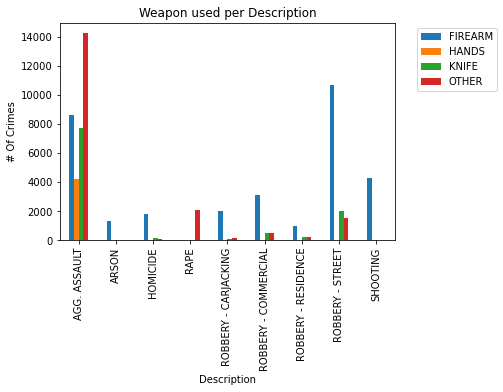

In [46]:
#Lets see if there are patterns for weapon based on description
description_weapon_df = create_counts_df("Description", "Weapon")
#First tried with including 'None' but too many are 'None' to see the other distributions
description_weapon_df = description_weapon_df[description_weapon_df.Weapon != 'None']

ax = description_weapon_df.pivot(index='Description', columns='Weapon').plot(kind='bar', title="Weapon used per Description", ylabel="# Of Crimes", xlabel="Description", rot=90)
patches, labels = ax.get_legend_handles_labels()
labels = ['FIREARM', 'HANDS', 'KNIFE', 'OTHER']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

For the description of each crime, we can see the distribution of each weapon used.  The conclusion is that police will be able to know what weapon, if any, is likely to have been used or to be used given a particular crime took or might take place in the future.  The description of the crime clearly has an impact on the type of weapon that is being used - so we will definitely want to include it in our model.

# Feature Engineering

To get the data ready to use in the models I will do some feature engineering first.

In [48]:
#here we create dummy features for each of the categorical columns we see as valuable for our model
#the pandas get_dummies function returns a dataframe with the dummies used for that column
#then I concat that dataframe onto the original and drop the original column
df = crime_data.copy() #copy the crime_data into df to use here
dummies = pd.get_dummies(df['InsideOutside'])
dummyDF = pd.concat([df, dummies], axis=1).drop(['InsideOutside'], axis=1)

dummies = pd.get_dummies(df['Description'])
dummyDF = pd.concat([dummyDF, dummies], axis=1).drop(['Description'], axis=1) #add onto the dummies DF

dummies = pd.get_dummies(df['Premise'])
dummyDF = pd.concat([dummyDF, dummies], axis=1).drop(['Premise'], axis=1)
dummyDF = dummyDF.drop(['UNKNOWN'], axis=1) #unknown column is not going to tell us anything - drop it
dummyDF.head(2)

,CrimeDate,CrimeTime,CrimeCode,Location,Weapon,Post,District,Neighborhood,Longitude,Latitude,...,TRUCKING & TRANSFER,UTILITIES-BG&E-C&P,VACANT BUILDING,VACANT DWELLING,VACANT LOT/WOODS,VEHICLE,WAREHOUSE,WHOLESALE/DISC. STOR,YARD,YARD/BUSINESS
0,9/5/20,1:30:00,6G,800 PONTIAC AVE,None,913.0,SOUTHERN,BROOKLYN,-76.598564,39.233880,...,0,0,0,0,0,0,0,0,0,0
1,9/5/20,19:57:00,4E,4900 GUNTHER AVE,None,443.0,NORTHEAST,FRANKFORD,-76.549157,39.327377,...,0,0,0,0,0,0,0,0,0,0


In the crime data, the data I need to use is categorical.  The machine learning models used are not able to interpret the categorical data for training/predicting from the model.  For this reason, I have to convert the data to be numerical.  The way I do this is by creating dummy columns for each unique value within a single column.  For example let's look at the inside/outside column.  The possible values here are Inside, Outside, and UNKNOWN.  So, three new columns are created - Inside, Outside, and UNKNOWN.  If the value for a particular crime instance of the inside/outside column is Inside, the Inside column will have a 1 in it, and the Outside and UNKNOWN columns will each have 0's in them.  So, this tells our model that the crime was commited inside, and not outside or unknown.  I use this format for the premise and description as well - each of them have many more different unique values which means that we generate a lot of columns.  I decided to not use the other columns such as Location, Neighborhood, and District.  I did not use Location or Neighborhood because there are so many different ones that the number of columns added to the model increases the complexity so much.  I did not use the District column because in our exploratory analysis I already found that it did not really have an impact on the weapon used.  The model can best understand the data in this format.

In [50]:
#Create columns for the hour and month, since they seem to have the highest impact
df["CrimeDate"] = df["CrimeDate"].astype("datetime64")
df["CrimeTime"] = df["CrimeTime"].astype("datetime64")

dummyDF['CrimeMonth'] = pd.DatetimeIndex(df['CrimeDate']).month
dummyDF['CrimeHour'] = pd.DatetimeIndex(df['CrimeTime']).hour
dummyDF.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Weapon,Post,District,Neighborhood,Longitude,Latitude,...,VACANT BUILDING,VACANT DWELLING,VACANT LOT/WOODS,VEHICLE,WAREHOUSE,WHOLESALE/DISC. STOR,YARD,YARD/BUSINESS,CrimeMonth,CrimeHour
0,9/5/20,1:30:00,6G,800 PONTIAC AVE,None,913.0,SOUTHERN,BROOKLYN,-76.598564,39.233880,...,0,0,0,0,0,0,0,0,9,1
1,9/5/20,19:57:00,4E,4900 GUNTHER AVE,None,443.0,NORTHEAST,FRANKFORD,-76.549157,39.327377,...,0,0,0,0,0,0,0,0,9,19
2,9/5/20,2:10:00,4D,600 MELVILLE AVE,HANDS,515.0,NORTHERN,WAVERLY,-76.607271,39.331543,...,0,0,0,0,0,0,0,0,9,2
3,9/5/20,1:00:00,7A,AV & REISTERSTOWN RD,None,611.0,NORTHWEST,LIBERTY SQUARE,-76.655664,39.322638,...,0,0,0,0,0,0,0,0,9,1
4,9/5/20,8:10:00,4C,1900 W FAIRMOUNT AVE,OTHER,714.0,WESTERN,PENROSE/FAYETTE STREET OUTREACH,-76.647524,39.288932,...,0,0,0,0,0,0,0,0,9,8


Another couple of important features of the model and seen to have an impact on the weapon type used are the time of day and time of year.  In order to capture this in the model I created two new columns - the hour of day, and month of year.  I did this by extracting those values from the CrimeDate and CrimeTime columns.  The month is a value from 1-12 and the hour is a value from 0-23.  I decided to not use minutes or seconds becuase the those details within the hour do not intuitively make much of a difference.  For example, whether it is 1am or 1:30am is not likely to matter much just the fact that it is early in the morning.  Same for the day within a month - whether it is January 23 or 24th is not likely to matter much.  Our model can best understand these values to use as predictors.

# Modeling

In [56]:
#Function to Draw tree taken from python utils file

def draw_tree(estimator, figsize =(15, 5), feature_names = ["Hits", "Years"]):
    """
    Takes a decision  tree estimator and plots it's tree structure
    :param estimator: A sklearn decision tree estimator. Should be fitted.
    :param figsize: tuple. (int, int).
    :param feature_names:
    :return: It returns a plot. The image is not saved.
    """
    fig = plt.figure(figsize= figsize)
    _ = tree.plot_tree(estimator,
                       feature_names= feature_names,
                       filled=True)

[[ 3614     0     0  1234  1717]
 [    0     0     0     0   842]
 [  500     0     0   104  1569]
 [ 1757     0     0 47478     0]
 [  425     0     0   528  2811]]


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     FIREARM       0.57      0.55      0.56      6565
       HANDS       0.00      0.00      0.00       842
       KNIFE       0.00      0.00      0.00      2173
        None       0.96      0.96      0.96     49235
       OTHER       0.41      0.75      0.53      3764

    accuracy                           0.86     62579
   macro avg       0.39      0.45      0.41     62579
weighted avg       0.84      0.86      0.85     62579



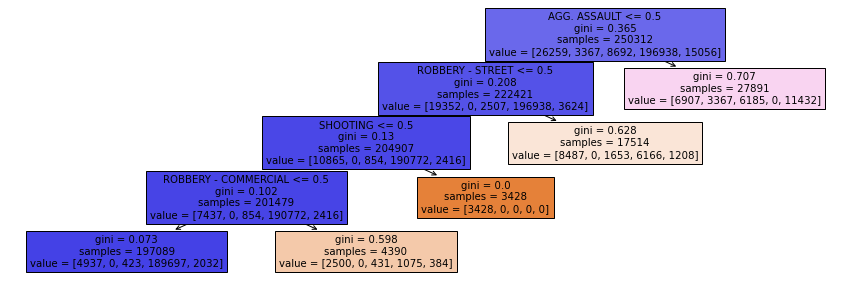

In [57]:
## here let's apply sklearn DecisionTreeClassifier

#drop the columns that are not predictors
X = dummyDF.drop(['Weapon', 'CrimeDate', 'CrimeTime', 'Location', 'CrimeCode', 'Post', 'District', 'Neighborhood', 'Longitude', "Latitude"], axis=1)
#print(X.head())
y = dummyDF['Weapon'] #set the goal to be the classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1, stratify = y) #split the data

classifier = DecisionTreeClassifier(max_leaf_nodes= 5) #create the classifier and fit it
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)  #predict using the test data for metrics

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

draw_tree(classifier,feature_names= X_train.columns)

The model results here give us hope that we will be able to beat the 78.7% accuracy rate of the dummy model.  In the results above we see that the accuracy of this model is 86%.  In this experiment I made the max leaf nodes stop at 5 so that the top of the tree could more clearly be seen and interpreted.  In attempt to try to make the decision tree better I attempt another experiment using corss validation next.  The top left of the output also contains a confusion matrix.  The vertical axis of this table is the actual classification and the horizontal is the predicted.  So, the numbers along the diagnal are the correctly classified ones.  The accuracy is therefore the sum of the numbers along the diagnal divided by the total sum.  Recall refers to a horizontal row within the confusion matrix - for actual class 0 (FIREARM), there were 3614+0+0+1234+1717 for 6565 total of the actual class and 3614 were classified correctly so recall is 3614/6565 or 0.55.  Precision refers to a vertical column in the confusion matrix - for predicted class 0 (FIREARM), there were 3614+0+500+1757+425 for a total of 6296 total predicted as class 0 (FIREARM), and 3614 were classified correctly, so precision is 3614/6296 or 0.57.  Also notice that in this model, it never predicts hands or knife.  These two weapons occur the least in the dataset and the model did not find that fitting to them would be optimal.  Something to note, expecially with only going down to 5 leaf nodes, the model here is likely underfit to the data and may be able to perform better with different parameters.

So, next I will use GridSearchCV to perform cross-validation to find a better performing model.

There are many reasons I decided to use cross-validation.  First, compared to a leave-one-out approach, it is more computationally friendly.  Second, there are many benefits of using it.  The goal of machine learning is to minimize the error in the tests, which are predicting/classifying for never seen before data.  When using cross validation, all data is used as both training and testing data as in our 10-fold cross validation, 10 different models are created for each depth, using 10% of the data for testing in each model and 90% for training.  Each increment of the 10% test data is stepped through, with the remaining 90% being the training data.  So, every data observation is used for testing at least once and every observation is used for training k-1 times.  When we have a bunch of weaker models, the thought is to potentially combine them into one stronger model.  Since we have seen so far with modeling this data that it is relatively weak, cross validation sounds like an excellent idea.

Another benefit is its balance for the variance-bias trade-off.  It has lower bias than just a single validation set approach since a single validation set approach is more dependent on how good the random split of the test and training sets was.  It also has lower variance than leave-one-out-cross-validation (LOOCV) as the model is more generalized rather than overfitting by training with all but one observation in the data.

In turn, we look to see what we can get out of these decision tree results.  Decision trees are built based on splitting each division by what will give the least amount of impurity.  We can use one of two techniques: Gini or Entropy.

Gini is measured by:

$\large G = 1 - \Sigma_i p_{i}^2$,

Where $p_{i}$ is the fraction of items labeled with class $i$ in the set.

We determine the information gain by calculating the entropy.  Entropy is given by:

$\large E = -\Sigma_i p_i\log_2(p_i)$,

Both Gini and Entropy are measures of impurity and used to calculate information gain.  Entropy is always between 0 and 1, the closer it is to 0 the better.  The higher the entropy, the more disordered the group is.  Information gain is the entropy of the parent group minus the entropy of the split so performance is maximized by minimizing the splits entropy.  It follows that when decision trees are created, they examine the entropy/gini of all possible splits, and choose the split with the highest information gain.

Knowing this, we can interpret our decision tree results.  In the graphic I created we see the root split is split based off of the Agg. Assault feature.  Then by Robbery - Street, Shooting, and Robbery - Commercial.  This tells us that these are the most important features when determining the type of weapon used.  Note that they all have to do with the description off the crime - and this makes sense.  Obviously, if the description of the crime is a shooting, a firearm is much more likely to have been used.  The job description appears to have the largest impact on the type of weapon used, and more specifically the top 4 being Agg. Assault, Robbery - Street, Shooting, and Robbery - Commercial.

Let's see if we can find the optimal decision tree:





In [61]:
#lets try a bunch of different parameters to see what gives the highest accuracy
grid = {'max_leaf_nodes': [5, 10, 15, 25, 100], 'ccp_alpha': [0, 0.01, 0.1, 1, 10, 100], "min_impurity_split":[0,0.1,0.2,0.3,0.4,0.5]}
grid_search_cv = GridSearchCV(estimator = classifier, param_grid= grid, cv =5, return_train_score= True, verbose= 2)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.cv_results_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0 .............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0, total=   1.9s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0, total=   1.7s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0 .............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0, total=   1.8s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0 .............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0, total=   2.4s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0 .............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0, total=   1.8s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.1 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.6s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.1 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.9s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.1 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.1, total=   2.1s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.1 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.1 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.2 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.7s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.2 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.2 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.6s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.2 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.7s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.2 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.2, total=   2.1s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.3 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.5s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.3 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.4s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.3 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.3 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.3 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.4 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.4, total=   1.0s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.4 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.4 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.4, total=   1.0s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.4 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.4 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.5 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.5 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.5 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.5 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.5 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0, total=   2.2s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0, total=   2.3s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0, total=   2.3s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0, total=   2.3s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0, total=   2.4s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0, total=   2.4s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0, total=   2.3s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0, total=   2.4s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0, total=   2.4s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.9s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.9s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.2, total=   1.6s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.2, total=   1.6s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.2, total=   1.7s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.2, total=   2.3s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.3, total=   1.4s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.3, total=   1.4s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.3, total=   1.4s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.3, total=   1.4s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.4, total=   1.0s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.4, total=   1.1s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.4, total=   1.8s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.4, total=   1.5s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.4, total=   1.5s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.5, total=   1.3s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.5, total=   1.1s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.5, total=   1.0s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0, total=   3.5s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0, total=   3.9s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0, total=   3.1s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0, total=   4.6s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0, total=   3.7s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.1 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.1, total=   2.7s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.1 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.1, total=   2.2s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.1 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.1, total=   2.1s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.1 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.1, total=   2.9s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.1 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.1, total=   2.4s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.2 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.2, total=   1.9s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.2 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.2, total=   1.9s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.2 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.2, total=   1.9s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.2 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.2, total=   1.8s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.2 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.2, total=   1.8s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.3 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.3, total=   1.5s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.3 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.3, total=   1.5s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.3 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.3, total=   1.4s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.3 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.3, total=   1.5s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.3 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.3, total=   1.4s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.4 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.4 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.4 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.4 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.4 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.5 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.5 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.5 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.5 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.5 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0, total=   2.4s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0, total=   2.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0, total=   1.8s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0, total=   1.8s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0, total=   1.7s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.6s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.6s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.6s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.4s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.4s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.4, total=   1.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.4, total=   1.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0, total=   2.4s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0, total=   2.4s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0, total=   2.6s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0, total=   2.7s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.1, total=   2.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.1, total=   2.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.1, total=   2.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.4, total=   1.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.4, total=   1.1s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.4, total=   1.2s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.4, total=   1.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.5, total=   1.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0, total=   2.4s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0, total=   2.7s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0, total=   2.6s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.1, total=   2.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0, total=   2.7s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.2, total=   1.6s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.2, total=   1.7s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.3, total=   1.4s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.3, total=   1.4s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0, total=   2.7s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0, total=   2.7s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0, total=   2.7s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0, total=   2.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0, total=   2.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.1 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.1, total=   2.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.1 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.1, total=   2.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.1 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.1, total=   2.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.1 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.1, total=   2.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.1 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.1, total=   2.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.2 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.2, total=   1.7s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.2 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.2, total=   1.7s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.2 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.2, total=   3.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.2 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.2, total=   1.8s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.2 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.2, total=   2.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.3 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.3, total=   2.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.3 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.3, total=   1.5s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.3 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.3, total=   3.2s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.3 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.3, total=   2.3s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.3 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.3, total=   2.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.4 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.4 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.4 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.4, total=   1.0s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.4 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.4 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.5 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.5 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.5 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.5 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.5 ......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.01, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0, total=   1.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0, total=   1.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0, total=   1.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0, total=   1.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0, total=   1.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.1 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.5s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.1 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.6s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.1 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.1 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.6s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.1 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.5s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.2 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.3s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.2 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.3s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.2 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.3s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.2 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.3s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.2 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.3s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.3 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.1s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.3 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.1s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.3 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.3 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.3 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.1s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.4 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.4 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.4 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.4 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.4 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.5 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.5 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.5 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.5 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.5 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=5, min_impurity_split=0.5, total=   1.0s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0, total=   2.2s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0, total=   2.2s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0, total=   2.2s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0, total=   2.2s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0, total=   2.2s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.1, total=   1.6s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.1, total=   1.6s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.1, total=   1.6s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.1, total=   1.6s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.1, total=   1.6s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0, total=   2.3s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0, total=   2.3s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0, total=31.5min
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0, total=   3.2s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0, total=   2.4s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.2, total=   1.5s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.3, total=16.9min
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.4, total=   1.3s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.4, total=   2.3s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.4, total=   3.0s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.4, total=   1.1s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.4, total=   1.0s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=15, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0, total=58.2min
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0, total=   2.6s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0, total=   3.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0, total=   3.1s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.1, total=   2.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.1, total=   2.2s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.1, total=   2.1s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.1, total=   2.0s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.1 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.1, total=   1.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.2, total=   1.6s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.2, total=   1.6s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.2, total=   5.0s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.2, total=   4.2s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.2 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.2, total=   5.6s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.3, total=   4.2s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.3, total=   2.8s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.3, total=   3.4s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.3, total=   2.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.3 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.3, total=   1.6s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.4, total=   1.0s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.4, total=   1.2s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.4, total=   1.2s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.4, total=   1.0s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.4 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.4, total=   1.0s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.5, total=   1.0s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.5, total=   1.0s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.5 ........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=25, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0, total=   2.8s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0, total=   2.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0, total=   3.2s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0, total=   3.0s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0 .........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0, total=   2.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.1, total=   2.0s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.1, total=   2.0s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.1, total=   2.0s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.1, total=   2.0s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.1 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.1, total=   2.1s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.2, total=   1.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.2, total=   1.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.2, total=   1.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.2, total=   1.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.2 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.2, total=   1.7s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.3, total=   1.4s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.3, total=   1.6s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.3, total=   1.6s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.3, total=   1.5s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.3 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.3, total=   1.4s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.4 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.5 .......


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=0.1, max_leaf_nodes=100, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0 .............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0, total=   1.9s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0 .............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0, total=   2.0s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0 .............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0, total=   1.9s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0 .............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0, total=   1.8s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0 .............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0, total=   1.7s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.1 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.6s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.1 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.1 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.1 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.6s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.1 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.1, total=   1.6s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.2 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.3s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.2 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.3s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.2 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.2 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.3s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.2 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.2, total=   1.3s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.3 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.3 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.3 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.3 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.3 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.4 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.4 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.4 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.4 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.4 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.5 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.5 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.5 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.5, total=   1.0s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.5 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.5 ...........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=5, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0, total=   2.3s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0, total=   2.4s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0, total=   2.4s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0, total=   2.4s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.1, total=   2.0s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.1, total=   1.7s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.4s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.7s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.7s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.6s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.2, total=   1.7s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.3s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.3 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.3, total=   1.2s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.4 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.4, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.5 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=10, min_impurity_split=0.5, total=   0.9s
[CV] ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0, total=   3.0s
[CV] ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0, total=   2.5s
[CV] ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0, total=   2.4s
[CV] ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0 ............


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0, total=   2.9s
[CV] ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.8s
[CV] ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0.1, total=   1.9s
[CV] ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0.1 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


[CV]  ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0.1, total=   2.2s
[CV] ccp_alpha=1, max_leaf_nodes=15, min_impurity_split=0.2 ..........


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:310: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


KeyboardInterrupt: 

In [ ]:
#see the results in a table, sorted by descending mean test score
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

In [ ]:
## here is the optimal decision tree

#drop the columns that are not predictors
X = data.drop(['Weapon', 'CrimeDate', 'CrimeTime', 'Location', 'CrimeCode', 'Post', 'District', 'Neighborhood', 'Longitude', "Latitude"], axis=1)
y = data['Weapon'] #set the goal to be the classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) #split the data

classifier = DecisionTreeClassifier(max_leaf_nodes= 25, min_impurity_split=0, ccp_alpha=0) #create the classifier and fit it
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)  #predict using the test data for metrics

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

draw_tree(classifier,feature_names= X_train.columns)

I used GridSearchCV to run 180 candidate models from 900 fits to find a potential optimal decision tree model.  I can not say that it is the most optimal as there are parameters that could possibly make it better.  The goal is to maximize the test accuracy so I sorted by the mean_test_score.  This statistic is the mean test score for the accuracy of the 5 cross-validated models that GridSearchCV fit.  In this case I was able to get the accuracy up to 88% on average.  In this model the differences between it and the default model is the max_leaf_nodes being set to 25 (from default None) and the min_impurity_split is left as the default 0.  The max leaf nodes of 25 gives the tree room to grow and fit the data, but does put a limit on the number so that we prevent overfitting.  The min_impurity_split is the threshold for early stopping in tree growth - a node will split if its impurity is above the threshold, otherwise it is a leaf.  This also serves to prevent overfitting.  The model should generalize with the goal to maximize the test set accuracy, so we avoid overfitting here and create the best model we can.

In [62]:
#Now lets try logistic regression
lr = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'saga', max_iter= 100)
cv_fivefold = cross_validate(estimator= lr, 
                             X = X,
                             y = y,
                             cv = 5,
                             return_train_score= True, 
                             return_estimator= True, verbose = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................................. , total= 2.7min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.7min remaining:    0.0s
/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................................. , total= 2.5min
[CV]  ................................................................


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................................. , total= 2.6min
[CV]  ................................................................


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................................. , total= 2.6min
[CV]  ................................................................


/Users/ZachV/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ................................................. , total= 2.6min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 13.1min finished


In [63]:
#results of the initial model (cross-validated)
validation_mean = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()

print('Logistic Regression 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

Logistic Regression 5-fold cv results (Accuracy) 0.883 =/- 0.005


In [ ]:
#Grid Search CV
#now lets try to find the best parameters for logistic regression
grid = {'C': [0.0000000000001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'none'], 'solver' : ['saga', 'lbfgs', 'sag', 'newton-cg'], "max_iter":[100,1000]}
grid_search_cv = GridSearchCV(estimator = lr, param_grid= grid, cv =5, return_train_score= True, verbose= 2)
grid_search_cv.fit(X_train_scaled, y_train)
grid_search_cv.cv_results_

In [ ]:
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

NEED TO FINISH
The above logistic regression model uses GridSearchCV to run 144 candidates, totaling 720 fits.  Logistic regression is built off conditional probablility where we give a probability for each class given the features and take the highest one.  The optimal model used a C parameter of 0.1, the l1 penalty, saga solver, and 100 max iterations.  The 100 max iterations helps to reduce the chance of overfitting.  The C paramerter is the inverse of regularization strength and smaller values specify stronger regularization.  In this case, on average, the model predicted the correct classification 37.3%FIX THIS POOP of the time which is better than random guessing but not by a whole lot.  This model also appears to be worse than the decision trees so we will throw this model out as well.

Lastly, lets look at a random forest:



In [ ]:
#Grid Search CV
#now lets try to find the best parameters for random forests
#this takes a pretty long time to run
#top commented out line takes longer to run but may give better results
#grid = {'n_estimators': [50,300,500,700], 'max_leaf_nodes': [5, 15, 25, 100], 'ccp_alpha': [0, 0.01, 0.1, 1, 10], 'criterion' : ['gini', 'entropy'], "min_impurity_split":[0,0.1,0.3,0.5], "n_jobs": [4]}
grid = {'n_estimators': [50,100], 'max_leaf_nodes': [15, 30, 50], 'ccp_alpha': [0, 0.1], "min_impurity_split":[0,0.1,0.5], "n_jobs": [4]}
grid_search_cv = GridSearchCV(estimator = rf, param_grid= grid, cv =5, return_train_score= True, verbose= 2)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.cv_results_

In [ ]:
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

In [ ]:
#create the optimal random forest
rf = RandomForestClassifier(max_leaf_nodes = 50, min_impurity_split = 0.1, n_estimators= 100, max_features='auto')

cv_fivefold = cross_validate(estimator= rf, 
                             X = X_train,
                             y = y_train,
                             cv = 5,
                             return_train_score= True, 
                             return_estimator= True, 
                             verbose = 2)

In [ ]:
validation_mean = cv_fivefold['test_score'].mean()

validation_std = cv_fivefold['test_score'].std()

print('Random Forest 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

NEED TO FINISH
The above random forest is run for 24 candidates, resulting in 120 fits.  These random forests take much longer to run, so for simplicity and time I created two possible grids to run it with.  The first gives more candidate models, but takes a longer time to run while the second option that we use here only gives 120 fits and completes in minutes.  A random forest is a collection of decision trees, meant to be more robust than a single decision tree.  In the above results I see that the mean_test_score is ~0.35 which is still less than the accuracy of the single decision tree.  I think that these models are highly variable based on the randomness of the train test split.  From the cross-validated 5 models here it appears that decision trees seem to be the best model.  Please note that when you run it the results may be different.  I have seen standard deviations up to 0.05 - a 5% difference in accuracy is pretty large variation.  We set the max leaf nodes at 15 to avoid overfitting, and the min impurity split at 0.5 again to avoid overfitting, same as mentioned for the decision trees earlier if the information gain is not large enough we will just leave it as a leaf node.

# Results and Discussion

NEED TO FINISH
Lets begin analysing the results with the linear regression model.  Looking at the coefficients, we see that only 1 of the features is statistically significant.  We can tell this in a few different ways.  First by looking at the 95% confidence intervals on the right, we see that all of the intervals for the features (except the const, since this is the intercept we ignore its significance) all span 0.  Due to this fact, we cannot say that we are confident at all that the relationship between money spent on QB, RB, WR, TE, OL, DL, LB, S, CB, SpecialTeams are non-zero - there may be no relationship at all.  Another way we can tell is with the p-values.  Looking at the p-value column (P> |t|) we see that all of these values are greater than 0.05, except for PercentUsed.  This means that the probability that each of those features is not different from 0 is greater than 5% for all but PercentUsed showing again that PercentUsed is the only statistically signinficant feature.  

The R-squared value of 0.211 is interpreted to mean that roughly 21.1% of the variance in wins can be explained by these predictor variables.  This is not great, so I try to use the techniques of ridge and lasso regression as described in the experiments section to improve the model.  Neither ended up really improving the OLS model, so the result is to stay with the OLS model.  Ridge performed similarly to OLS, and lasso ignored too many of our features to be of any use at all, saying that none of them had any significance.  The r-squared tend to bounce between 0 and 0.2 for 30 iterations of random testing for both OLS and Ridge while the r-squared for lasso remained around or slightly below 0.  Making the model polynomial only hurt the r-squared values and validness of the model, which makes sense given that there were no patterns in the original residuals plot.

Moving onto the classification problem of classifying a team as good, bad, or mediocre I started with a decision tree model.  In this model, the model itself bounced around 33% accuracy, which is the same as taking a random guess at the classification of 1 of the 3 categories.  So, I ran cross-validation on the decision trees and took the mean score of the trees - finding that the accuracy of these tended to be in the 36-38% range, slightly better showing that the model might be a little better than random guessing.  I then experimented more with parameters to see what the optimal model is.  By doing this I was able to increase accuracy up to 46%, which is the best I ever saw and is the reason that I chose to go with this decision tree as the final model.  The other result to note here is that the decision tree tended to split early and often on PercentUsed showing that this is the most impactful feature when predicting wins for an NFL team.  I experimented with KNN, logistic regression, and random forests to see if its results were any better and found that they were not really an improvement over the decision trees.  The decision trees are also simple to interpret.

Mean Accuracies:

Decision trees: 0.444301

KNN: 0.373548

Logistic Regression: 0.41828

Random forests: 0.353548

Please note that these accuracies will change based on the randomness of the train test splits.  I have seen them vary a good amount, and that is a negative effect of having a smaller dataset.  There is a good amount of variation and the accuracy of the model is heavily dependent on how good the random split is.

# Conclusion and Summary

NEED TO FINISH

The conclusion of the findings in this project is that there is not really a correct way to allocate money within the salary cap per position that leads to the team being successful, but what is most impactful is that team owners spend the money that they are allowed to spend.  There are a lot of ways for a team to be successful.  For example a team might have a really good offense by spending a lot on QB, RB, WR, TE, and OL and less on defense and be succesful because the offense is so good they don't need a good defense.  On the flip side if a team spends more on having a really good defense and no one can score on them, no matter how good their offense is they are going to be successful, other teams find success in a more balanced approach.  Bottom line is that there is no one right written way to allocate money by position to be successful.  There are also many other factors involved in the number of wins a team gets.  For example, the coaching staff matters, there is a little luck involved if a team loses a close game or two due to a bad call, their wins for the year are 2 off from projections (2 wins is a big difference).

The most important information that we can takeaway from the results is that it is important for teams to spend all of the money they are allowed to within the cap and reduce dead money to zero if possible.  If a team only spends 60% of the alloted cap space, they don't have as good of a chance to win as a team who spent 100% of their cap space.  This makes sense as the better players the team buys in general, the higher chance they have at being successful.

# Limitations and Future Work

One of the challenges to exploring this data is finding trends that are specific down to a specific address, latitude or longitude.  There are so many unique addresses and coordinates that analyzing each and everyone of these situations is difficult.  Another limitation is in the nature of the data being categorical data.  Categorical data is a little bit more of a challenge to represent in these machine learning models and the feature engineering portion of the project is important to represent the data well in the models.  With this, certain models do not work as well.  Another model that I tried but decided not to use was KNN.  This model just took way too long to train to get any good information from it.  This is because the number of columns needed in this data becomes large due to its needing of dummy variables since it is categorical and as a result KNN modeling each instance in a highly dimensional space takes too much time.

For future work, I would like to see if deep learning has any improvement on the results - if it can better predict when the lesser weapons of hands or knife would be used.  I could also talk to police to determine what question to answer would be the most helpful for them to know.  Perhaps they only really care if a firearm is used or not - in which case I could revise the work to predict either firearm or not firearm.  I could also expand in the questions I answer for example if we can potentially predict other things such as whether the crime was inside or outside.  In the future I'd like to find what question the police really care about most and answer that.

# References and Contributions

Data contributions:
- Open Baltimore: https://data.baltimorecity.gov/Public-Safety/BPD-Part-1-Victim-Based-Crime-Data/wsfq-mvij/data

Machine learning references and contributions:
- Professor Guner's lecture notes
- Sklearn documentation: https://scikit-learn.org/stable/index.html
- ISLR Textbook: https://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf
- Dealing with categorical data: https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/
- Feature Engineering guidance: https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/
